In [ ]:
import pandas as pd 
import sklearn as skl
import numpy as np

In [ ]:
data = pd.read_csv('real_estate_valuation_preprocessed.csv')
data

Nomber  Transaction date  ...  Longitude  House price of unit area
0         1       2012.916667  ...  121.54024                      37.9
1         2       2012.916667  ...  121.53951                      42.2
2         3       2013.583333  ...  121.54391                      47.3
3         4       2013.500000  ...  121.54391                      54.8
4         5       2012.833333  ...  121.54245                      43.1
..      ...               ...  ...        ...                       ...
409     410       2013.000000  ...  121.50381                      15.4
410     411       2012.666667  ...  121.54310                      50.0
411     412       2013.250000  ...  121.53986                      40.6
412     413       2013.000000  ...  121.54067                      52.5
413     414       2013.500000  ...  121.54310                      63.9

[414 rows x 8 columns]

In [ ]:
data = data.drop('Nomber',1) #убираем ненужный столбец индексов
data

Transaction date  House age  ...  Longitude  House price of unit area
0         2012.916667       32.0  ...  121.54024                      37.9
1         2012.916667       19.5  ...  121.53951                      42.2
2         2013.583333       13.3  ...  121.54391                      47.3
3         2013.500000       13.3  ...  121.54391                      54.8
4         2012.833333        5.0  ...  121.54245                      43.1
..                ...        ...  ...        ...                       ...
409       2013.000000       13.7  ...  121.50381                      15.4
410       2012.666667        5.6  ...  121.54310                      50.0
411       2013.250000       18.8  ...  121.53986                      40.6
412       2013.000000        8.1  ...  121.54067                      52.5
413       2013.500000        6.5  ...  121.54310                      63.9

[414 rows x 7 columns]

In [ ]:
data[data['House price of unit area']>70]['House price of unit area'].count()

6

In [ ]:
6/114*100

5.263157894736842

Видим, что это действительно выбросы, избавимся от них для улучшения качества регрессии.

In [ ]:
data=data[data['House price of unit area']<70]

Избавились от выбросов по цене дома превышающих 70. Можно было бы избавиться от выбросов, их 3 штуки, ниже 12, но! Протестировал на всех алгоритмах. Результат: на всех алгоритмах качество либо ниже, либо такое же, кроме регрессии дерева без параметров, там качество было 0.77

In [ ]:
X = data.drop('House price of unit area',1)
y = data['House price of unit area'].values

Нормировка ни к чему хорошему не привела, пробовал тоже на всех алгоритмах, оставил код закомменченным, чтобы показать, что пытался.

In [ ]:
X=X.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19) #делим на тест и тренировку

#Линейная регрессия

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = reg.predict(X_test)

In [ ]:
def metric(y_true,predskaz): #ФУНКЦИЯ ДЛЯ ВЫВОДА МЕТРИК, ЧТОБЫ НЕ КОПИПАСТИТЬ
  print('R2 = ', skl.metrics.r2_score(y_true,predskaz))
  print('Mean Square Error = ', skl.metrics.mean_squared_error(y_true,predskaz))
  print('Root Mean Square Error = ', skl.metrics.mean_squared_error(y_true,predskaz,squared=False))
  print('mean absolute error = ', skl.metrics.mean_absolute_error(y_true,predskaz))


In [ ]:
metric(y_test,pred)

R2 =  0.6971285477935167
Mean Square Error =  47.71022674878432
Root Mean Square Error =  6.907258989554708
mean absolute error =  5.242285199971556


Довольно хороший результат (опять же, относительно моих следующих показателей), ещё и линейная регрессия. Будем каждый раз смотреть на графике, чтобы видеть, насколько у нас получается давать верные ответы по сравнению с истинными.

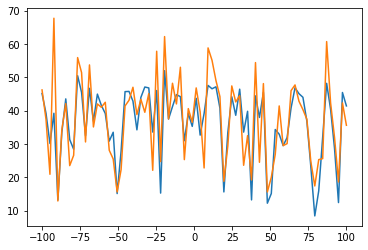

In [ ]:
import matplotlib.pyplot as plt
fig = plt.subplots()
plt.plot(np.linspace(-100, 100,78),pred)
plt.plot(np.linspace(-100, 100,78),y_test) #оранжевый

Синий график довольно хорошо аппроксимирует график ответов.

In [ ]:
reg.get_params().keys() #параметров для подбора нету

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

#Регрессия дерева решений

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()

In [ ]:
tree_reg.fit(X_train,y_train)

In [ ]:
pred = tree_reg.predict(X_test)

In [ ]:
metric(y_test,pred)

R2 =  0.6404247723077625
Mean Square Error =  56.6425641025641
Root Mean Square Error =  7.526125437604937
mean absolute error =  5.387179487179487


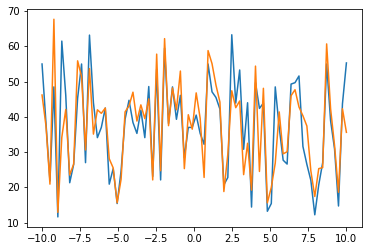

In [ ]:
import matplotlib.pyplot as plt
fig = plt.subplots()
plt.plot(np.linspace(-10, 10,78),pred)
plt.plot(np.linspace(-10, 10,78),y_test) #оранжевый

Линейная регрессия справлялась лучше, но тоже неплохо

In [ ]:
tree_reg.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [ ]:
parameters = {'max_depth': range(1,25),
              'max_features': range(1,20),
              'min_samples_split': range(1,20)}

In [ ]:
from sklearn import model_selection

cv = model_selection.StratifiedShuffleSplit(n_splits=10, test_size = 0.19, random_state = 0)

In [ ]:
grid_cv = model_selection.GridSearchCV(tree_reg, parameters, scoring = 'r2', cv = 5)

In [ ]:
grid_cv.fit(X_train, y_train)

In [ ]:
grid_cv.best_params_

{'max_depth': 5, 'max_features': 4, 'min_samples_split': 6}

In [ ]:
grid_cv.best_score_

0.6859375037231187

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth= 5, max_features= 4, min_samples_split= 6)

In [ ]:
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
pred = tree_reg.predict(X_test)

In [ ]:
metric(y_test,pred)

R2 =  0.7974786895113425
Mean Square Error =  31.902437732188393
Root Mean Square Error =  5.648224299033139
mean absolute error =  4.345476674733303


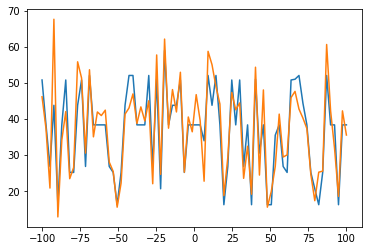

In [ ]:
import matplotlib.pyplot as plt
fig = plt.subplots()
plt.plot(np.linspace(-100, 100,78),pred)
plt.plot(np.linspace(-100, 100,78),y_test) #оранжевый

Получили самый лучшей результат по метрикам из того, что вообще получилось достичь. Ну и точность предсказаний хорошо видно на графике.

#LASSO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [ ]:
lasso = skl.linear_model.Lasso()

In [ ]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
pred = lasso.predict(X_test)

In [ ]:
metric(y_test,pred)

R2 =  0.6811597507710079
Mean Square Error =  50.22573265499894
Root Mean Square Error =  7.087011546131341
mean absolute error =  5.245902661002188


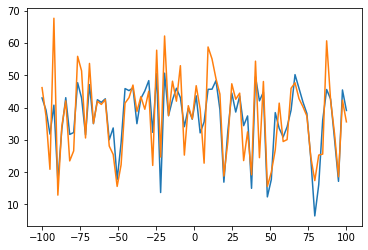

In [ ]:
import matplotlib.pyplot as plt
fig = plt.subplots()
plt.plot(np.linspace(-100, 100,78),pred)
plt.plot(np.linspace(-100, 100,78),y_test) #оранжевый

In [ ]:
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
parameters = {'alpha': np.arange(0.0050,0.0060,0.0001),
              'max_iter': np.arange(100,300,50),
              'selection': ['cyclic','random'],
              'tol': [0.00001,0.0001,0.01,0.1,1,0.000001],}

Диапазоны подбирались постепенно, т.к. полный перебор больших диапазонов значений занимает много времени и сил.

In [ ]:
grid_cv = model_selection.GridSearchCV(lasso, parameters, scoring = 'r2', cv = 10)

In [ ]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
       0.0058, 0.0059]),
                         'max_iter': array([100, 150, 200, 250]),
                         'selection': ['cyclic', 'random'],
                         'tol': [1e-05, 0.0001, 0.01, 0.1, 1, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
grid_cv.best_params_ # alph=0.005 iter=100

{'alpha': 0.005800000000000002,
 'max_iter': 250,
 'selection': 'random',
 'tol': 0.1}

In [ ]:
grid_cv.best_score_

0.5897880890817241

In [ ]:
lasso = skl.linear_model.Lasso(alpha=0.005300000000000001,max_iter=100, 
                               selection='random',tol=0.1)
lasso.fit(X_train,y_train)
pred = lasso.predict(X_test)
metric(y_test, pred)

R2 =  0.7005050211472497
Mean Square Error =  47.178343310631824
Root Mean Square Error =  6.868649307588197
mean absolute error =  5.222267343915239


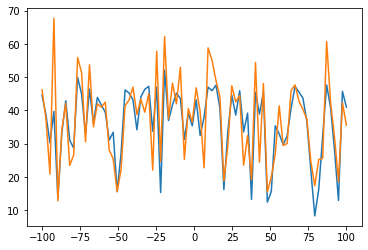

In [ ]:
import matplotlib.pyplot as plt
fig = plt.subplots()
plt.plot(np.linspace(-100, 100,78),pred)
plt.plot(np.linspace(-100, 100,78),y_test) #оранжевый

#Гребневая регрессия

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()

In [ ]:
ridge.fit(X_train,y_train)
pred = ridge.predict(X_test)
metric(y_test,pred)

R2 =  0.6876472752909163
Mean Square Error =  49.20377676041661
Root Mean Square Error =  7.014540381266374
mean absolute error =  5.3603427254911455


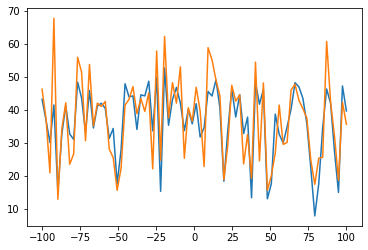

In [ ]:
import matplotlib.pyplot as plt
fig = plt.subplots()
plt.plot(np.linspace(-100, 100,78),pred)
plt.plot(np.linspace(-100, 100,78),y_test) #оранжевый

In [ ]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [ ]:
parameters = {'alpha': np.arange(0.001,1.,0.01) ,
              "fit_intercept": [True], 
              "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [ ]:
grid_cv = model_selection.GridSearchCV(ridge, parameters, scoring = 'r2', cv = 10)

In [ ]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.2...
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
                         'fit_intercept': [True],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             pre_dispatch=

In [ ]:
grid_cv.best_params_

{'alpha': 0.001, 'fit_intercept': True, 'solver': 'cholesky'}

In [ ]:
grid_cv.best_score_

0.5898887094212715

In [ ]:
ridge = Ridge(alpha=0.001,fit_intercept=True,solver='cholesky')

In [ ]:
ridge.fit(X_train,y_train)
pred = ridge.predict(X_test)
metric(y_test,pred)

R2 =  0.697633350734761
Mean Square Error =  47.63070699670881
Root Mean Square Error =  6.901500343889639
mean absolute error =  5.240687195055323


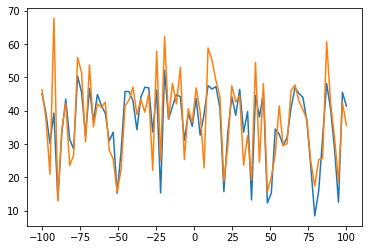

In [ ]:
fig = plt.subplots()
plt.plot(np.linspace(-100, 100,78),pred)
plt.plot(np.linspace(-100, 100,78),y_test) #оранжевый

#Elastic Net регрессия

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
en = ElasticNet()

In [ ]:
en.fit(X_train,y_train)
pred = en.predict(X_test)
metric(y_test,pred)

R2 =  0.680669296570456
Mean Square Error =  50.302992102687895
Root Mean Square Error =  7.092460229193245
mean absolute error =  5.253353968783252


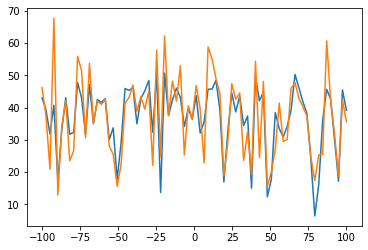

In [ ]:
fig = plt.subplots()
plt.plot(np.linspace(-100, 100,78),pred)
plt.plot(np.linspace(-100, 100,78),y_test) #оранжевый

In [ ]:
en.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
parameters = {'alpha': np.arange(0,3,0.1) ,
              "l1_ratio": np.arange(0.1,1,0.1), 
              'selection': ['random', 'cyclic'],
              'tol':np.arange(0.00001,0.001,0.0001)}

In [ ]:
grid_cv = model_selection.GridSearchCV(en, parameters, scoring = 'r2', cv = 10)

In [ ]:
grid_cv.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8124.2433522413385, tolerance: 28.434763830976433
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8241.7172

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'selection': ['random', 'cyclic'],
                         'tol': array([1.0e-05, 1.1e-04, 2.1e-04, 3.1e-04, 4.1e-04, 5.1e-04, 6.1e-04,
       7.1e-04, 8.1e-04, 9.1e-04])},
             pre_dispatch='2*n_jobs', refit=True, return_t

In [ ]:
grid_cv.best_params_

{'alpha': 0.0,
 'l1_ratio': 0.1,
 'selection': 'random',
 'tol': 0.0009100000000000001}

In [ ]:
grid_cv.best_score_

0.5897228722170159

In [ ]:
en = ElasticNet(alpha=0.0,l1_ratio=0.1,selection='random',tol=0.0009100000000000001)

In [ ]:
en.fit(X_train,y_train)
pred = ridge.predict(X_test)
metric(y_test,pred)

R2 =  0.697633350734761
Mean Square Error =  47.63070699670881
Root Mean Square Error =  6.901500343889639
mean absolute error =  5.240687195055323


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9413.522134526505, tolerance: 46.469948731818185
  positive)


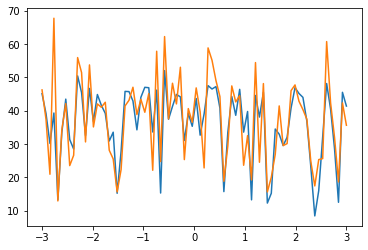

In [ ]:
fig = plt.subplots()
plt.plot(np.linspace(-3, 3,78),pred)
plt.plot(np.linspace(-3, 3,78),y_test)

In [ ]:
pred

array([34.86234191, 37.73859791, 47.61608305, 44.57065066, 32.34154909,
       29.53775795, 27.73486604, 33.39654441, 21.57651294, 29.24430252,
       48.06962121, 37.29988075, 47.51408209, 34.47775266, 28.89087274,
       37.60731038, 30.97986145, 44.78105304, 25.2428897 , 39.63133571,
       46.29020611, 39.92123615, 46.47303819, 44.16322256, 38.28592189,
       34.94911234, 27.05024926, 46.81395394,  9.11135114, 31.42498725,
       28.59484901, 30.32017335, 34.12683104, 43.36095528, 40.75725397,
       32.74548151, 30.28978372, 35.01321516, 31.89346306,  9.93695515,
        9.76075349, 30.75093133, 37.36007519, 47.52416474, 53.92004189,
       34.1214678 , 46.20436743, 33.90992306, 49.94039853, 45.9299692 ,
       42.69278699, 53.92004189, 43.93842898, 31.20735394, 48.10911117,
       36.80904648, 46.41746879, 45.30810411, 53.48987937, 37.2003877 ,
       53.65666337, 47.24878559, 49.26560328, 33.43528081, 37.11183283,
       44.88098881, 46.52596973, 21.80109113, 48.88831633, 42.89

In [ ]:
y_test

array([62.9, 35.3, 47.3, 44. , 31.3, 26.2, 22.8, 39.6, 21.8, 27.3, 48.6,
       34.6, 55.5, 23.9, 26.6, 43.2, 21.8, 78. , 16.1, 43.9, 31.6, 40.6,
       53.7, 40.6, 34. , 27. , 23.8, 59.6, 17.4, 37. , 18.3, 21.5, 23.7,
       44.3, 35.5, 39.7, 25.7, 22.1, 27. , 13.2, 15.5, 22.9, 30.7, 49.3,
       59. , 25.5, 54.4, 41.4, 63.2, 48.1, 29.3, 58.1, 52.2, 23.5, 60.7,
       26.9, 57.4, 40.1, 63.9, 37.4, 49.8, 58.8, 44. , 29.5, 28.4, 52.5,
       42. , 22. , 50.8, 42.1, 20. , 24.7, 33.1, 34.1, 30.5, 21.8, 52.7,
       61.9, 20.7])

In [ ]:
y_test-pred

array([ 28.03765809,  -2.43859791,  -0.31608305,  -0.57065066,
        -1.04154909,  -3.33775795,  -4.93486604,   6.20345559,
         0.22348706,  -1.94430252,   0.53037879,  -2.69988075,
         7.98591791, -10.57775266,  -2.29087274,   5.59268962,
        -9.17986145,  33.21894696,  -9.1428897 ,   4.26866429,
       -14.69020611,   0.67876385,   7.22696181,  -3.56322256,
        -4.28592189,  -7.94911234,  -3.25024926,  12.78604606,
         8.28864886,   5.57501275, -10.29484901,  -8.82017335,
       -10.42683104,   0.93904472,  -5.25725397,   6.95451849,
        -4.58978372, -12.91321516,  -4.89346306,   3.26304485,
         5.73924651,  -7.85093133,  -6.66007519,   1.77583526,
         5.07995811,  -8.6214678 ,   8.19563257,   7.49007694,
        13.25960147,   2.1700308 , -13.39278699,   4.17995811,
         8.26157102,  -7.70735394,  12.59088883,  -9.90904648,
        10.98253121,  -5.20810411,  10.41012063,   0.1996123 ,
        -3.85666337,  11.55121441,  -5.26560328,  -3.93

In [ ]:
import matplotlib.pyplot as plt

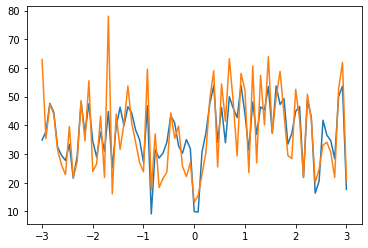

In [ ]:
fig = plt.subplots()
plt.plot(np.linspace(-3, 3,79),pred)
plt.plot(np.linspace(-3, 3,79),y_test)

Видим, что все модели хорошо предсказывают направление движения цены, но не могут "почувствовать пики". Самым точным оказывались предсказания регресии дерева решений, как и стоило думать. 
Так же я посчитал, что график после каждого предсказания хорошо заменит мои слова, но я старался давать комментарии там, где считал нужным.